# Ejercicio1 - Busqueda de Alojamiento en Airbnb (Jupyter).

Supongamos que somos un agente de [Airbnb](http://www.airbnb.com) localizado en Lisboa, y tenemos que atender peticiones de varios clientes. Tenemos un archivo llamado `airbnb.csv` (en la carpeta data) donde tenemos información de todos los alojamientos de Airbnb en Lisboa.

In [1]:
import pandas as pd
df_airbnb = pd.read_csv("./data/airbnb.csv")

In [2]:
df_airbnb.head()

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0


En concreto el dataset tiene las siguientes variables:
- room_id: el identificador de la propiedad
- host_id: el identificador del dueño de la propiedad
- room_type: tipo de propiedad (vivienda completa/(habitacion para compartir/habitación privada)
- neighborhood: el barrio de Lisboa
- reviews: El numero de opiniones
- overall_satisfaction: Puntuacion media del apartamento
- accommodates: El numero de personas que se pueden alojar en la propiedad
- bedrooms: El número de habitaciones
- price: El precio (en euros) por noche

## Ejercicios

### 1. Realizar Análisis Exploratorio de los datos

Sobre este apartado deberá explorar los datos como se vio en clase .. aplicar métodos shape, columns, etc

In [1]:
import os

print("Archivos en la carpeta actual:")
print(os.listdir("."))

print("Archivos dentro de /data:")
print(os.listdir("./data"))



Archivos en la carpeta actual:
['README.md', '.git', 'reporte1.csv', 'data', 'reporte2.csv', 'reporte1.xlsx', 'Problema2.ipynb', 'vinos.db', '.venv', 'Problema1.ipynb']
Archivos dentro de /data:
['airbnb.csv', 'reactiva.xlsx', 'winemag-data-130k-v2.csv']


In [2]:
import pandas as pd
df_airbnb = pd.read_csv("data/airbnb.csv")

# Ver las dimensiones del dataset
print("Shape:", df_airbnb.shape)

# Ver columnas
print("Columnas:", df_airbnb.columns)

# Tipos de datos
print("Tipos de datos:")
print(df_airbnb.dtypes)

# Estadísticas generales
df_airbnb.describe()

# Valores nulos
df_airbnb.isnull().sum()


Shape: (13232, 9)
Columnas: Index(['room_id', 'host_id', 'room_type', 'neighborhood', 'reviews',
       'overall_satisfaction', 'accommodates', 'bedrooms', 'price'],
      dtype='object')
Tipos de datos:
room_id                   int64
host_id                   int64
room_type                object
neighborhood             object
reviews                   int64
overall_satisfaction    float64
accommodates              int64
bedrooms                float64
price                   float64
dtype: object


room_id                  0
host_id                  0
room_type                0
neighborhood             0
reviews                  0
overall_satisfaction    10
accommodates             0
bedrooms                 0
price                    0
dtype: int64

### 2. Realizar Filtrados a Datos

- Realizar filtrados, según sea el caso. 


Nota: 
Para obtener el top de un conjunto de datos debemos aplicar un head(n) además de ordenar los datos

Caso 1.

Alicia va a ir a Lisboa durante una semana con su marido y sus 2 hijos. Están buscando un apartamento con habitaciones separadas para los padres y los hijos. No les importa donde alojarse o el precio, simplemente quieren tener una experiencia agradable. Esto significa que solo aceptan lugares con más de 10 críticas con una puntuación mayor de 4. Cuando seleccionemos habitaciones para Alicia, tenemos que asegurarnos de ordenar las habitaciones de mejor a peor puntuación. Para aquellas habitaciones que tienen la misma puntuación, debemos mostrar antes aquellas con más críticas. Debemos darle 3 alternativas.

In [3]:
# Filtrado
df_alicia = df_airbnb[
    (df_airbnb['reviews'] > 10) &
    (df_airbnb['overall_satisfaction'] > 4) &
    (df_airbnb['bedrooms'] >= 2)
]

# Ordenar por puntuación y número de críticas
df_alicia = df_alicia.sort_values(by=['overall_satisfaction', 'reviews'], ascending=[False, False])

# Mostrar 3 alternativas
df_alicia.head(3)


,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
120,176153,842219,Entire home/apt,Misericórdia,438,5.0,4,2.0,102.0
16,44043,192830,Entire home/apt,Santa Maria Maior,316,5.0,7,3.0,80.0
140,202150,989393,Entire home/apt,Santa Maria Maior,274,5.0,4,2.0,62.0


Caso 2

Roberto es un casero que tiene una casa en Airbnb. De vez en cuando nos llama preguntando sobre cuales son las críticas de su alojamiento. Hoy está particularmente enfadado, ya que su hermana Clara ha puesto una casa en Airbnb y Roberto quiere asegurarse de que su casa tiene más críticas que las de Clara. Tenemos que crear un dataframe con las propiedades de ambos. Las id de las casas de Roberto y Clara son 97503 y 90387  respectivamente. Finalmente guardamos este dataframe como excel llamado "roberto.xls

In [4]:
# Filtrar por IDs
df_roberto_clara = df_airbnb[df_airbnb['room_id'].isin([97503, 90387])]

# Mostrar
print(df_roberto_clara)

# Guardar como Excel
df_roberto_clara.to_excel("roberto_vs_clara.xlsx", index=False)


    room_id  host_id     room_type   neighborhood  reviews  \
41    90387   490050  Private room  Santo António      204   
48    97503   515924  Private room  Santo António       39   

    overall_satisfaction  accommodates  bedrooms  price  
41                   5.0             2       1.0   46.0  
48                   4.0             2       1.0   26.0  



Caso 3

Diana va a Lisboa a pasar 3 noches y quiere conocer a gente nueva. Tiene un presupuesto de 50€ para su alojamiento. Debemos buscarle las 10 propiedades más baratas, dandole preferencia a aquellas que sean habitaciones compartidas *(room_type == Shared room)*, y para aquellas viviendas compartidas debemos elegir aquellas con mejor puntuación.

In [11]:
df_diana = df_airbnb[
    (df_airbnb['price'] <= 50) &
    (df_airbnb['room_type'] == "Shared room")
]

# Ordenar por precio y satisfacción
df_diana = df_diana.sort_values(by=['price', 'overall_satisfaction'], ascending=[True, False])

# Mostrar 10 mejores
df_diana.head(10)


,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
1010,1179457,5799522,Shared room,Santo António,42,4.0,16,1.0,10.0
3562,5557699,28812904,Shared room,Santa Maria Maior,22,4.0,1,1.0,10.0
7584,13116032,72951043,Shared room,Arroios,1,0.0,8,1.0,10.0
13148,19314160,135270245,Shared room,Santa Clara,0,0.0,1,1.0,10.0
9065,14933182,91501272,Shared room,Santo António,5,5.0,8,1.0,11.0
4353,6728244,28812904,Shared room,Santa Maria Maior,8,4.5,1,1.0,11.0
5616,9317561,48360716,Shared room,Arroios,13,4.5,4,1.0,11.0
6640,11693356,28812904,Shared room,Santa Maria Maior,3,4.5,1,1.0,11.0
6641,11693442,28812904,Shared room,Santa Maria Maior,16,4.5,1,1.0,11.0
8908,14708916,91501272,Shared room,Santo António,18,4.5,4,1.0,11.0


### 3. Realizar Agrupamientos de Datos


- Según su criterio, aplicar 2 tipos de agrupamientos a los datos brindados. 
- **Opcional**, averiguar como realizar el gráfico de los 2 agrupamientos de los datos realizados. Se podría emplear librerias como mathplot y searbon ... ayudarse de chatgtp, etc


In [12]:
# Agrupamiento 1: Promedio por tipo de habitación
group1 = df_airbnb.groupby('room_type')[['price', 'overall_satisfaction']].mean()
print(group1)

# Agrupamiento 2: Promedio de críticas por vecindario
group2 = df_airbnb.groupby('neighborhood')['reviews'].mean().sort_values(ascending=False)
print(group2.head(10))  # Top 10 barrios más comentados


                      price  overall_satisfaction
room_type                                        
Entire home/apt  101.338181              3.529526
Private room      45.629967              2.604034
Shared room       34.397661              2.441520
neighborhood
Santa Maria Maior    43.825232
Misericórdia         39.298501
São Vicente          30.735831
Estrela              27.765878
Santo António        27.752941
Olivais              26.990741
Arroios              21.417668
Beato                19.785714
Penha de França      17.260442
Campo de Ourique     17.021944
Name: reviews, dtype: float64


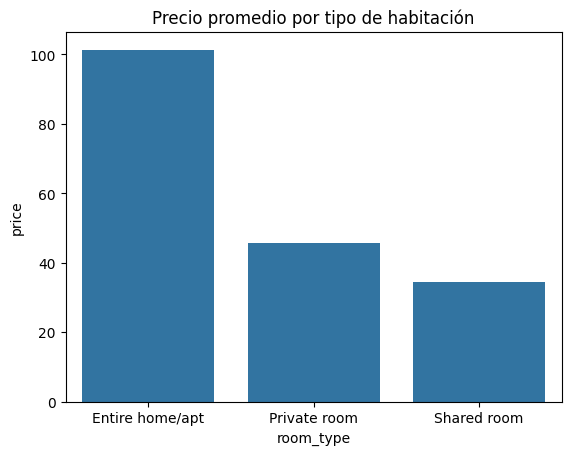

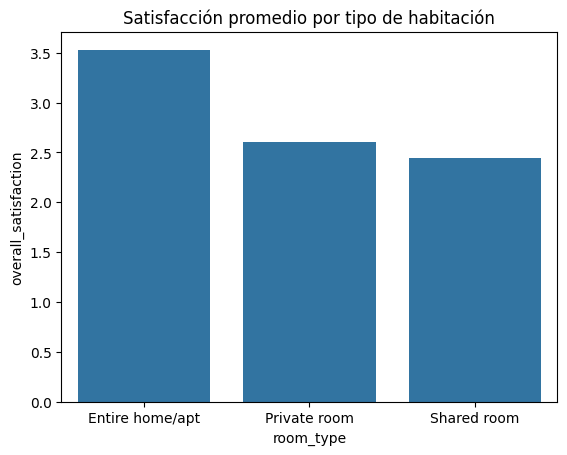

In [13]:
#Opcional:

import seaborn as sns
import matplotlib.pyplot as plt

# Precio por tipo de habitación
sns.barplot(x=group1.index, y=group1['price'])
plt.title("Precio promedio por tipo de habitación")
plt.show()

# Satisfacción por tipo de habitación
sns.barplot(x=group1.index, y=group1['overall_satisfaction'])
plt.title("Satisfacción promedio por tipo de habitación")
plt.show()
